In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['ITSA4', 'GOAU4', 'EMBR3', 'TOTS3', 'CPFE3', 'MGLU3']
pf_data = pd.read_csv('Pfolio_stocks_br 2.csv', index_col='Date')

In [4]:
pf_data.head()

,ITSA4,GOAU4,EMBR3,TOTS3,CPFE3,MGLU3
Date,,,,,,
6/22/15,5.233504,6.552751,23.188370,35.928272,17.112970,0.333173
6/23/15,5.233504,6.468259,23.043196,37.256237,16.955807,0.322208
6/24/15,5.221835,6.271112,22.694790,36.728786,16.789963,0.312930
6/25/15,5.134320,6.196010,22.646400,36.540443,16.274797,0.301965
6/26/15,5.245173,6.318053,23.178694,37.623459,16.973259,0.301965


In [5]:
pf_data.tail()

,ITSA4,GOAU4,EMBR3,TOTS3,CPFE3,MGLU3
Date,,,,,,
6/15/20,9.56,6.42,8.58,21.170000,31.600000,65.849998
6/16/20,9.76,6.89,9.05,21.030001,31.170000,66.000000
6/17/20,9.93,6.85,8.95,22.150000,31.959999,67.190002
6/18/20,10.25,7.02,8.87,22.740000,31.690001,69.699997
6/19/20,NaN,NaN,NaN,NaN,NaN,NaN


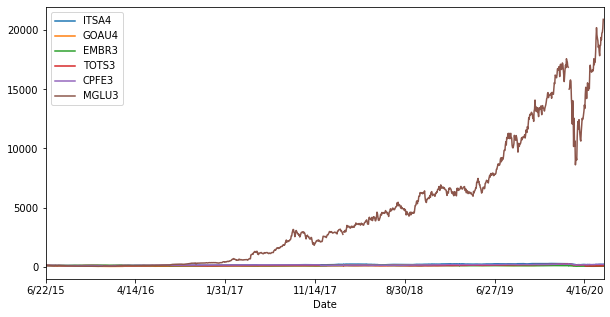

In [8]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [10]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [11]:
log_returns.mean() * 250

ITSA4    0.144447
GOAU4    0.031857
EMBR3   -0.174132
TOTS3   -0.069446
CPFE3    0.137019
MGLU3    1.088018
dtype: float64

In [12]:
log_returns.cov() * 250

,ITSA4,GOAU4,EMBR3,TOTS3,CPFE3,MGLU3
ITSA4,0.105731,0.096622,0.051671,0.053153,0.044916,0.080253
GOAU4,0.096622,0.358694,0.079921,0.077247,0.063535,0.143415
EMBR3,0.051671,0.079921,0.197199,0.056133,0.034881,0.066016
TOTS3,0.053153,0.077247,0.056133,0.391293,0.040627,0.059065
CPFE3,0.044916,0.063535,0.034881,0.040627,0.085081,0.060878
MGLU3,0.080253,0.143415,0.066016,0.059065,0.060878,0.494934


In [13]:
log_returns.corr()

,ITSA4,GOAU4,EMBR3,TOTS3,CPFE3,MGLU3
ITSA4,1.000000,0.496148,0.357843,0.261322,0.473569,0.350820
GOAU4,0.496148,1.000000,0.300503,0.206189,0.363691,0.340377
EMBR3,0.357843,0.300503,1.000000,0.202076,0.269292,0.211311
TOTS3,0.261322,0.206189,0.202076,1.000000,0.222664,0.134216
CPFE3,0.473569,0.363691,0.269292,0.222664,1.000000,0.296667
MGLU3,0.350820,0.340377,0.211311,0.134216,0.296667,1.000000


In [14]:
num_assets = len(assets)

In [15]:
num_assets

6

In [17]:
arr = np.random.random(6)
arr

array([0.57163686, 0.01943759, 0.37265777, 0.43062249, 0.49888054,
       0.17540831])

In [18]:
arr[0] + arr[1] + arr[2] + arr[3] + arr[4] + arr[5]

2.068643580260848

In [19]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.17662383, 0.1837569 , 0.10013833, 0.27340039, 0.10729224,
       0.15878832])

In [21]:
weights[0] + weights[1] + weights[2] + weights[3] + weights[4] + weights[5]

1.0000000000000002

In [22]:
np.sum(weights * log_returns.mean()) * 250

0.18240843335048598

In [23]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.11661759477221297

In [24]:
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.341493184078706

In [25]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns, pfolio_volatilities

([0.3486343535494762,
  0.09723492163312378,
  0.2383542298480522,
  0.06825945958314021,
  0.0980978409625936,
  0.352858856890935,
  0.04206756078800467,
  0.0419428688289683,
  0.08854166593172966,
  0.3878962895983003,
  0.10688679789225225,
  0.10992280615916633,
  -0.03991150422989628,
  0.02441507023658072,
  0.19824644281978177,
  0.21069252060763388,
  0.25907792583695854,
  0.19157152345820175,
  0.10863275554676806,
  0.15141234327478525,
  0.11700026550652803,
  0.2877223817871735,
  0.048386746808396504,
  0.07320417849508892,
  0.1493599430747754,
  0.09954178954965347,
  0.17490231537166345,
  0.25930813296978517,
  0.29157226577465717,
  0.1348372664117221,
  0.1505631330568756,
  0.047549840115715655,
  0.30430074835313836,
  0.281630915225432,
  0.08626949017323497,
  0.007688104960321052,
  0.12498325174993208,
  0.04495073985952884,
  0.36655750378182594,
  0.32002432878587445,
  0.21811917690357727,
  0.32325905774060193,
  0.23043503230521187,
  0.193379305305744,

In [29]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 2.44168930e-01,  1.13002171e-01,  2.04300815e-01,  9.34053178e-02,
         8.66353414e-02,  2.66500168e-01,  1.61959783e-01,  3.02255508e-01,
         2.42418726e-01,  1.75954586e-01,  6.63882926e-02,  1.21076086e-01,
         1.08792676e-01,  1.32779179e-01,  1.76313853e-01,  2.63500987e-01,
         3.69302978e-01,  5.46604793e-02,  1.23512832e-01,  6.10347452e-02,
         2.27985574e-01,  9.10562187e-02,  2.15895593e-01,  3.48814873e-01,
         1.47326769e-01,  1.68169694e-02,  1.69014092e-01,  2.91572958e-02,
         2.81695905e-01,  1.00376691e-01,  2.57226757e-01,  9.95964156e-02,
         2.86960234e-01,  7.25451622e-02,  3.44737914e-01,  3.77824953e-01,
         2.26071667e-01,  2.84052550e-01,  2.91563195e-01,  1.05701207e-01,
         3.34481025e-01,  1.33852808e-01,  2.77562859e-01,  3.34760528e-01,
         1.06512028e-01,  3.34692845e-01,  1.91114455e-01,  3.54468020e-02,
         1.90397987e-01,  5.19895003e-01,  3.67694440e-01,  3.39195025e-01,
         3.2

In [30]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [31]:
portfolios.head()

,Return,Volatility
0,0.244169,0.290325
1,0.113002,0.303736
2,0.204301,0.379814
3,0.093405,0.311561
4,0.086635,0.285492


In [33]:
portfolios.tail()

,Return,Volatility
995,0.309283,0.360206
996,0.228581,0.348013
997,0.093101,0.319334
998,0.248706,0.339094
999,0.049714,0.301888


Text(0, 0.5, 'Expected Return')

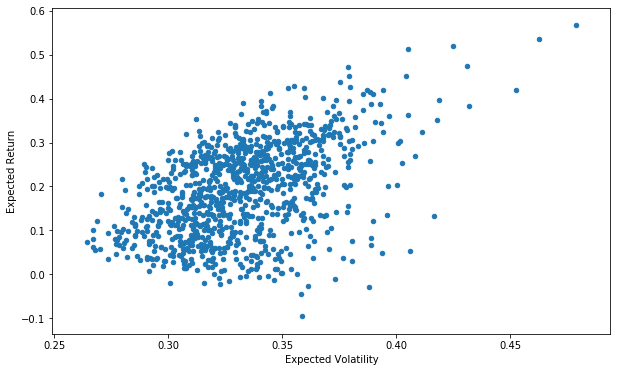

In [34]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')